# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

## Comments

Q1 -> Good
Q2 -> Good
Q3 -> Good
Q4 -> Good
Q5 -> Good
Q6 -> Good
Q7 -> Good
Q8 -> df.hist() is a useful command to get quick distribution plots of all the columns
Q9 -> Good
Q10 -> while the general idea of normalizing data is correct the skew in this case is too small to correct. 
Q11 -> Good
Q12 -> Good
Q13 -> Good
Q14 -> Good

### Step 1: Load the python libraries you will need for this project 

In [129]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [130]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [131]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [132]:
#function

In [133]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: There is a larger range of possible GRE scores than GPA. 

#### Question 4. Drop data points with missing data


In [147]:
drop = df_raw.dropna()
print drop

     admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
5        1  760.0  3.00       2.0
6        1  560.0  2.98       1.0
7        0  400.0  3.08       2.0
8        1  540.0  3.39       3.0
9        0  700.0  3.92       2.0
10       0  800.0  4.00       4.0
11       0  440.0  3.22       1.0
12       1  760.0  4.00       1.0
13       0  700.0  3.08       2.0
14       1  700.0  4.00       1.0
15       0  480.0  3.44       3.0
16       0  780.0  3.87       4.0
17       0  360.0  2.56       3.0
18       0  800.0  3.75       2.0
19       1  540.0  3.81       1.0
20       0  500.0  3.17       3.0
21       1  660.0  3.63       2.0
22       0  600.0  2.82       4.0
23       0  680.0  3.19       4.0
24       1  760.0  3.35       2.0
25       1  800.0  3.66       1.0
26       1  620.0  3.61       1.0
27       1  520.0  3.74       4.0
28       1  78

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [148]:
drop.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

When using the count function to count all of data points it shows that there are 397 observations in the data set whilst before dropping the missing data there were 400. 

#### Question 6. Create box plots for GRE and GPA

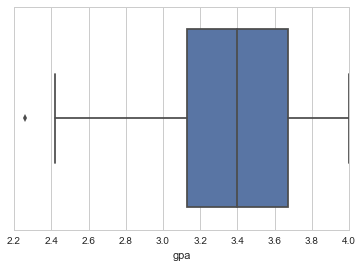

In [149]:
#boxplot 1 
import seaborn as sns  
gre_plt = sns.boxplot(x="gpa", data=drop)

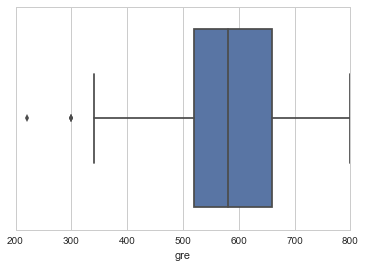

In [150]:
#boxplot 2 
gpa_plt = sns.boxplot(x="gre", data=drop)

#### Question 7. What do this plots show?

Answer: They show the distributions of the GRE and the GPA scores. Specifically you can tell the quartiles of the data, the range and the median value. If you compare the two you can see that the range for GRE in scored values is smaller than for GPA. 

#### Question 8. Describe each distribution 

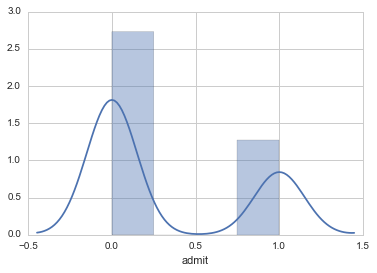

In [155]:
# plot the distribution of each variable 
sns.distplot(drop['admit']);

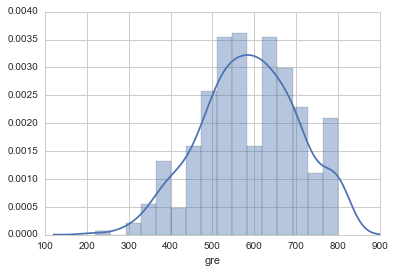

In [156]:
sns.distplot(drop['gre']);

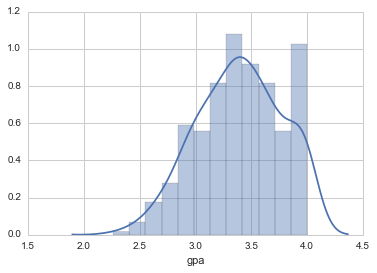

In [157]:
sns.distplot(drop['gpa']);

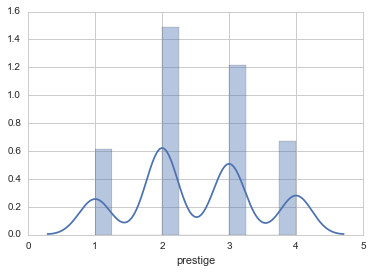

In [158]:
sns.distplot(drop['prestige']); 

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: For GPA and GRE the models seem to meet the requirements of normal distrubution even though they seem to be slightly negatively skewed. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Test scores should have a normal distribution. As mentioned above, GRE and GPA are both seem to be slightly skewed thus they should be corrected. 

#### Question 11. Which of our variables are potentially colinear? 

In [159]:
# create a correlation matrix for the data
drop.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: The GRE and the GPA of students is positively correlated, thus students with a high GRE are likely to have a higher GPA and students with a higher GPA are likely to have a higher GRE. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: The research question would be: Is the prestige of the undergraduate school that the students attend influence the likelihood of being admitted to grad school? Preferably, this should be analyzed whilst controlling for GRE and GPA to be able to know that those values aren't influencing admission. This can be analyzed by looking at how many students are accepted in each prestige rank(1-4). 

#### Question 14. What is your hypothesis? 

Answer: The hypothesis is that the higher the prestige rank of the school the more students are accepted to grad school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data